<div style="background-color: darkgreen ; padding: 10px; border-radius: 5px;">

***ANALYSE DES DONNEES ACTIVITE EMPLOI ET CHOMAGE - ENQUETE EMPLOI EN CONTINU***  \
Source : https://www.data.gouv.fr/fr/datasets/activite-emploi-et-chomage-enquete-emploi-en-continu

</div>

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

from simpledbf import Dbf5

In [111]:
#Importation des fichiers de données
eec23 = pd.read_csv('FD_csv_EEC23/FD_csv_EEC23.csv', delimiter=';')
eec22_dbf = Dbf5('FD_EEC_2022_dbase/FD_EEC_2022.dbf')
eec22 = eec22_dbf.to_dataframe()

In [112]:
#Importation des fichiers descriptifs des modalités des variables
varmod_eec23 = pd.read_csv('FD_csv_EEC23/Varmod_EEC_2023.csv', delimiter=';')
varmod_eec22_dbf = Dbf5('FD_EEC_2022_dbase/varmod_EEC_2022.dbf')
varmod_eec22 = varmod_eec22_dbf.to_dataframe()

<div style="background-color: darkgreen ; padding: 10px; border-radius: 5px;">

**ANALYSE DES DONNEES ACTIVITE EMPLOI ET CHOMAGE - EEC DE 2023**

</div>

In [113]:
# Affichage des différentes variables(columns) de la base de données 
eec23.columns

Index(['AAC', 'ACL_EMPLOI', 'ACTEU', 'AGE6', 'AISCO2', 'ANCCHOM', 'ANCEMPL4',
       'ANCSSEMP', 'ANNEE', 'APCS1', 'APCS2', 'CHAMP_M_15_89', 'CHPUB',
       'COUPL_LOG', 'DEMNE', 'DIP7', 'DISPONE', 'DISPPLC', 'ENFRED', 'ESEG_1',
       'ESEG_2', 'EXTRIAN', 'HALOR', 'HEFFEMP', 'HEFFTOT', 'HHABEMP',
       'HHABTOT', 'IDENT', 'ISCO2', 'METRODOM', 'MRANE', 'MRBNE', 'MRCNE',
       'MRDNE', 'MRENE', 'MRFNE', 'MRGNE', 'MRHNE', 'MRINE', 'MRJNE',
       'NAFANTG004N', 'NAFANTG088N', 'NAFG004UN', 'NAFG010UN', 'NAFG017UN',
       'NAFG021UN', 'NAFG038UN', 'NAFG088UN', 'NATIO', 'NOI', 'OFFICC',
       'PASTRA', 'PASTRB', 'PCS1Q', 'PCSL', 'PCSP', 'PUB3FP', 'RABS',
       'RAISDISPPLC', 'RAISNDISPONE', 'RAISNRECNE', 'RAISNSOUNE', 'RAISTP',
       'RECNE', 'SALTYP', 'SEXE', 'SO', 'SOU_C', 'SOUSEMPL', 'SOUSEMPLR',
       'STATUT', 'STATUTDET', 'STAT_CS', 'STAT_CSPRL', 'STC', 'STCOMM2020',
       'STPLC', 'TEMP', 'TPPRED', 'TRAREF', 'TRIM', 'TXTPPRED', 'TYPLOG5'],
      dtype='object')

La description des codes des variables se trouve dans le fichier "varmod_EEC_2023". C'est également le cas pour la base de données de 2022.

In [114]:
#Vérification des données manquantes
missing_values = eec23.isnull().sum()
print(missing_values[missing_values > 0])

AAC           173184
ACL_EMPLOI     40045
AISCO2        166930
ANCCHOM       334803
ANCEMPL4      181694
               ...  
STPLC         181694
TEMP          305550
TPPRED        181694
TRAREF         46282
TXTPPRED      318697
Length: 64, dtype: int64


La base de données comporte plusieurs valeurs manquantes. Il est crucial de comprendre la signification de ces valeurs avant d'utiliser les variables concernées. Je m'assurerai de le faire progressivement. En général, les valeurs manquantes correspondent à la modalité "hors champ", regroupant les réponses des personnes qui ne remplissent pas les conditions pour répondre à la question.

La base de données contient 83 variables et 348 624 observations.

<div style="background-color: darkgreen ; padding: 10px; border-radius: 5px;">

**ANALYSE EXPLOIRATOIRE DES DONNEES**

</div>

<div style="background-color: purple; padding: 10px; border-radius: 5px;">

ANALYSE DES LA VARIABLE **Statut d'activité [ACTEU]**  \
Champ : personnes de 15 ans ou plus (15<=AGE)

</div>

In [115]:
print(missing_values.loc['ACTEU'])

0


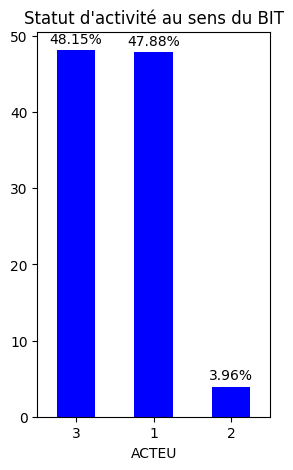

In [116]:
total = eec23['ACTEU'].value_counts().sum()
pourcentages = eec23['ACTEU'].value_counts() / total * 100

plt.figure(figsize=(3, 5))
ax = pourcentages.plot(kind='bar', color='b')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f"{i.get_height():.2f}%", ha='center', va='bottom')

plt.title("Statut d'activité au sens du BIT")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.show()

Statut d'activité au sens du Bureau International du Travail (BIT) :  \
1 -> Emploi  \
2 -> Chômage  \
3 -> Inactivité  

On observe qu'il y a presque autant de personnes occupées(ou en emploi) qu'il y a de personnes inactives. Le taux de chômage est quand à lui relativement faible et d'environ 4%

<div style="background-color: purple; padding: 10px; border-radius: 5px;">

ANALYSE DE LA VARIABLE **Emploi actuel ou dernier emploi [ACL_EMPLOI]**
Champ : personnes en emploi ou ayant travaillé ACTEU = 1(emploi) ou ACTEU =2(chômage),3(Inactif) et AAC(Exercice d’une activité antérieure pour les personnes sans emploi)=1(Oui)

</div>

Extraction des codes et libellés des données classe d'emploi.

In [117]:
acl_emploi_varmod = varmod_eec23[varmod_eec23['COD_VAR'] == 'ACL_EMPLOI']
acl_emploi_varmod = acl_emploi_varmod.drop(columns=['TYPE_VAR', 'LONG_VAR'])

In [118]:
acl_emploi_varmod.head()

,COD_VAR,LIB_VAR,COD_MOD,LIB_MOD
4,ACL_EMPLOI,Classe d'emploi (emploi actuel ou dernier emploi),I1,Emploi indépendant de niveau supérieur
5,ACL_EMPLOI,Classe d'emploi (emploi actuel ou dernier emploi),I2,Emploi indépendant de niveau intermédiaire
6,ACL_EMPLOI,Classe d'emploi (emploi actuel ou dernier emploi),I3,"Emploi de petit indépendant, avec salarié ou a..."
7,ACL_EMPLOI,Classe d'emploi (emploi actuel ou dernier emploi),I4,"Emploi de petit indépendant, sans salarié ou a..."
8,ACL_EMPLOI,Classe d'emploi (emploi actuel ou dernier emploi),A1,"Emploi salarié de niveau supérieur, d'orientat..."


In [119]:
# Recherche de valeurs manquantes
print(missing_values.loc['ACL_EMPLOI'])

40045


Création d'un dictionnaire permettant de faire correspondre les codes aux descriptions adéquates.

In [120]:
#Suppression valeurs manquantes pour eviter des erreurs dans le dictionnaire avec la modalité "hors champ"
acl_emploi_desc = acl_emploi_varmod.dropna(subset=['COD_MOD', 'LIB_MOD'])

#Création d'un dictionnaire contenant les codes des modalités et leurs descriptions
acl_emploi_dict = dict(zip(acl_emploi_desc['COD_MOD'], acl_emploi_desc['LIB_MOD']))

print(acl_emploi_dict)

{'I1': 'Emploi indépendant de niveau supérieur', 'I2': 'Emploi indépendant de niveau intermédiaire', 'I3': 'Emploi de petit indépendant, avec salarié ou aide familiale', 'I4': 'Emploi de petit indépendant, sans salarié ou aide familiale', 'A1': "Emploi salarié de niveau supérieur, d'orientation technique, en CDI", 'A2': "Emploi salarié de niveau supérieur, d'orientation tertiaire, en CDI", 'A3': 'Emploi salarié de niveau supérieur, fonctionnaire', 'A4': 'Emploi salarié de niveau supérieur, en contrat à durée limitée', 'B1': "Emploi salarié de niveau intermédiaire, d'orientation technique, en CDI", 'B2': "Emploi salarié de niveau intermédiaire, d'orientation tertiaire, en CDI", 'B3': 'Emploi salarié de niveau intermédiaire, fonctionnaire', 'B4': 'Emploi salarié de niveau intermédiaire, en contrat à durée limitée', 'C1': "Emploi salarié qualifié, d'orientation ouvrière, en CDI", 'C2': "Emploi salarié qualifié, d'orientation employée, en CDI", 'C3': 'Emploi salarié qualifié, fonctionnaire

Préparation des données pour visualisation

In [121]:
# Création d'un dataframe vide
eec23_acl_emploi = pd.DataFrame()

# Création d'une colonne 'code_mod' contenant les données codées des modalités
eec23_acl_emploi['code_mod'] = eec23['ACL_EMPLOI']
print(eec23_acl_emploi)

       code_mod
0            C2
1            C1
2            D1
3            B3
4            D1
...         ...
348619       C4
348620       C3
348621       D4
348622       D4
348623       B1

[348624 rows x 1 columns]


In [122]:
# Ajout de la colonne 'mod_lib' en faisant correspondre les codes(code_mod) à leurs descriptions respectives
eec23_acl_emploi['mod_lib'] = eec23_acl_emploi['code_mod'].map(acl_emploi_dict)

print(eec23_acl_emploi)

       code_mod                                            mod_lib
0            C2  Emploi salarié qualifié, d'orientation employé...
1            C1  Emploi salarié qualifié, d'orientation ouvrièr...
2            D1  Emploi salarié peu qualifié, d'orientation ouv...
3            B3  Emploi salarié de niveau intermédiaire, foncti...
4            D1  Emploi salarié peu qualifié, d'orientation ouv...
...         ...                                                ...
348619       C4  Emploi salarié qualifié, en contrat à durée li...
348620       C3             Emploi salarié qualifié, fonctionnaire
348621       D4  Emploi salarié peu qualifié, en contrat à duré...
348622       D4  Emploi salarié peu qualifié, en contrat à duré...
348623       B1  Emploi salarié de niveau intermédiaire, d'orie...

[348624 rows x 2 columns]


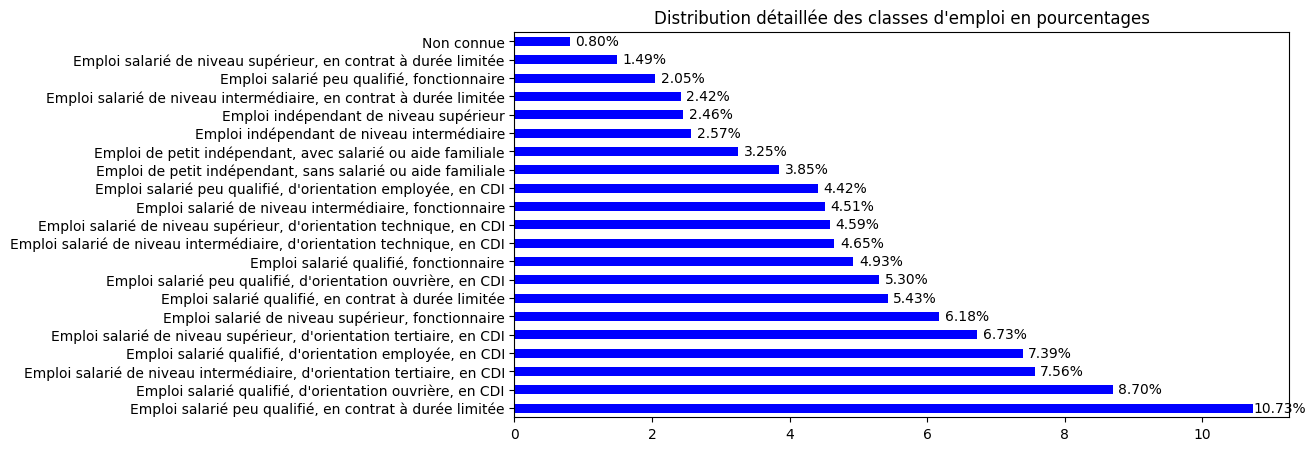

In [123]:
# Graphique en barres
total = eec23_acl_emploi['mod_lib'].value_counts().sum()
pourcentages = eec23_acl_emploi['mod_lib'].value_counts() / total * 100

plt.figure(figsize=(10, 5))

ax = pourcentages.plot(kind='barh', color='b')
for i in ax.patches:
    ax.text(i.get_width() + 0.4, i.get_y() + i.get_height() / 2, f"{i.get_width():.2f}%", ha='center', va='center')

plt.xlabel("")
plt.ylabel("")

plt.title("Distribution détaillée des classes d'emploi en pourcentages")
plt.show()


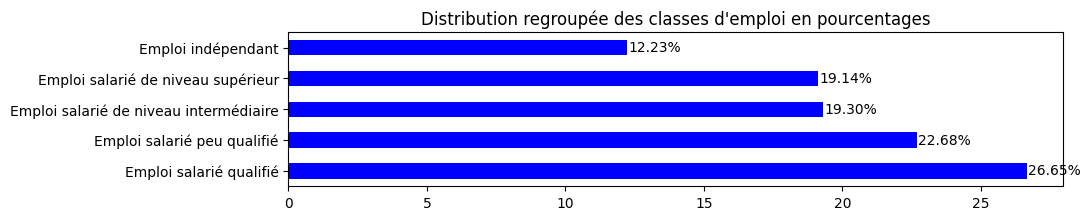

In [124]:
# Extraction du premier caractère de codes des modalités afin de les regrouper en classes
eec23_acl_emploi['code_mod_category'] = eec23_acl_emploi['code_mod'].apply(lambda x: x[0] if pd.notnull(x) else x)

# Définition d'un dictionnaire de classes
dictionnaire = {
    'A': 'Emploi salarié de niveau supérieur',
    'B': 'Emploi salarié de niveau intermédiaire',
    'C': 'Emploi salarié qualifié',
    'D': 'Emploi salarié peu qualifié',
    'I': 'Emploi indépendant'
}

# Correspondance
eec23_acl_emploi['classes'] = eec23_acl_emploi['code_mod_category'].map(dictionnaire)

# Calcul des pourcentages
total = eec23_acl_emploi['classes'].value_counts().sum()
pourcentages = eec23_acl_emploi['classes'].value_counts() / total * 100

plt.figure(figsize=(10, 2))

ax = pourcentages.plot(kind='barh', color='b')
for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + i.get_height() / 2, f"{i.get_width():.2f}%", ha='center', va='center')


plt.xlabel("")
plt.ylabel("")


plt.title("Distribution regroupée des classes d'emploi en pourcentages")
plt.show()

On observe que les emplois salariés peu qualifiés en CDD constituent la classe d'emploi la plus recrutée, représentant environ 11% du total. Cela inclut probablement de la main-d'œuvre ponctuelle (intérim) et possiblement des emplois secondaires. Une analyse plus approfondie, notamment en examinant le nombre d'heures travaillées, pourrait être intéressante. Les emplois salariés peu qualifiés en CDD pourraient représenter un grand nombre de contrats, mais un faible nombre d'heures travaillées.

En regroupant les données, on constate que les emplois salariés qualifiés dominent le marché du travail, suivis par les emplois salariés peu qualifiés. Les emplois salariés de niveau intermédiaire et les emplois salariés de niveau supérieur sont relativement au même niveau.

Les emplois indépendants, quant à eux, recrutent beaucoup moins et représentent environ 12% du total.


<div style="background-color: purple; padding: 10px; border-radius: 5px;">

ANALYSE DE LA VARIABLE **"Exercice d'une activité professionnelle régulière antérieure, pour les inactifs, chômeurs et personnes ayant une activité temporaire ou d'appoint autre qu'un emploi informel"[AAC]**
Champ : personnes sans emploi ACTEU=2 (chômage), 3(Inactif)

</div>

In [125]:
print(missing_values.loc['AAC'])

173184


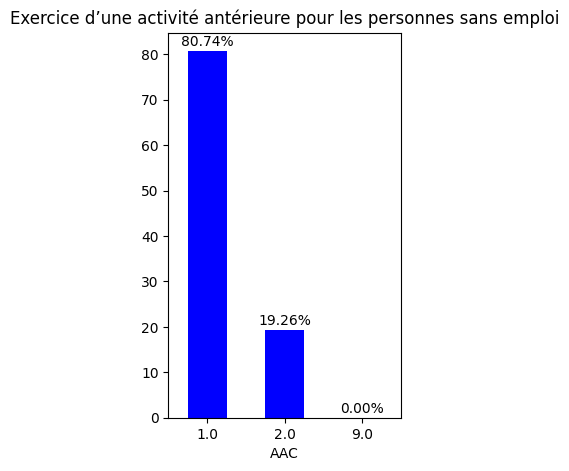

In [126]:
total = eec23['AAC'].value_counts().sum()
pourcentages = eec23['AAC'].value_counts() / total * 100

plt.figure(figsize=(3, 5))
ax = pourcentages.plot(kind='bar', color='b')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f"{i.get_height():.2f}%", ha='center', va='bottom')

plt.title("Exercice d’une activité antérieure pour les personnes sans emploi")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.show()

Exercice d'une activité professionnelle régulière antérieure, pour les inactifs, chômeurs et personnes ayant une activité temporaire ou d'appoint autre qu'un emploi informel :  \
1 -> Oui  \
2 -> Non  \
9 -> Non réponse

Il est notable que la majorité des personnes sans emploi, soit 80% des enquêtés, ont déjà exercé une activité professionnelle. Le faible taux de non-réponse, proche de zéro, est également rassurant et souligne la qualité des données collectées. 
Il serait intéressant de se pencher sur le profil des personnes sans emploi n'ayant jamais exercé une activité professionnelle ainsi que sur la durée de leur chômage pour mieux comprendre les dynamiques en jeu.

<div style="background-color: purple; padding: 10px; border-radius: 5px;">

ANALYSE DE LA VARIABLE **"Age en 6 tranches"[AGE6]**  \
Champ : ensemble des personnes

</div>

In [127]:
print(missing_values.loc['AGE6'])

0


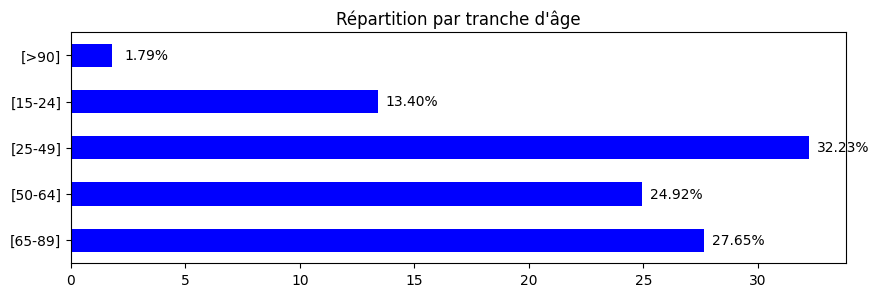

In [128]:
#Répartition des personnes enquêtées par tranche d'âge
dictionnaire_age = {
    0: '[0:14]',
    15: '[15-24]',
    25: '[25-49]',
    50: '[50-64]',
    65: '[65-89]',
    90: '[>90]'
}

eec23_age = eec23['AGE6'].map(dictionnaire_age)

total = eec23_age.value_counts().sum()
pourcentages = eec23_age.value_counts(sort=False) / total * 100

plt.figure(figsize=(10, 3))

ax = pourcentages.plot(kind='barh', color='b')
for i in ax.patches:
    ax.text(i.get_width() + 1.5, i.get_y() + i.get_height() / 2, f"{i.get_width():.2f}%", ha='center', va='center')

plt.xlabel("")
plt.ylabel("")

plt.title("Répartition par tranche d'âge")
plt.show()